1. K-means + 표로 만들기


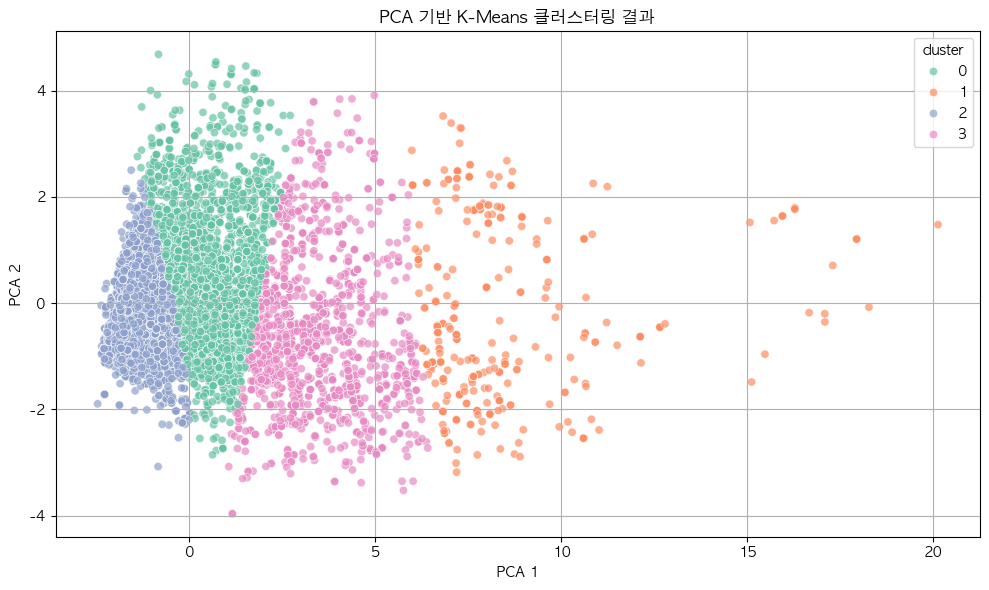

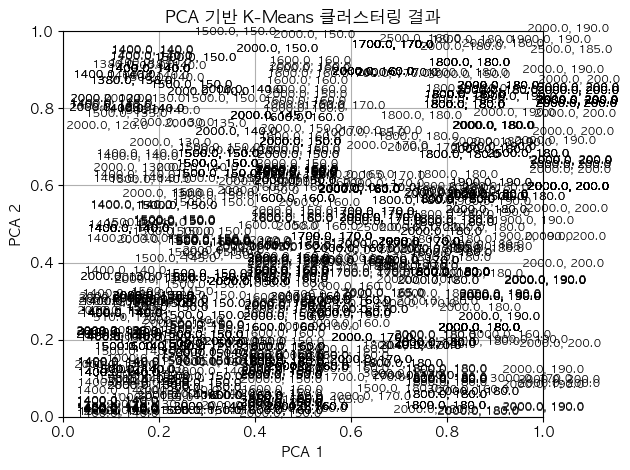

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기
df = pd.read_csv('clean_data.csv')

# 사용할 변수 지정
features = ['보증금', '월세', '전용면적', '예상 매매가', '단위 면적당 매매가', 'P_max']
X = df[features]

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', alpha=0.7)
plt.title('PCA 기반 K-Means 클러스터링 결과')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()


# 각 점에 대한 정보 추가
for i in range(len(df)):
    plt.annotate(f"{df['보증금'][i]}, {df['월세'][i]}", (df['PCA1'][i], df['PCA2'][i]), fontsize=8)

plt.title('PCA 기반 K-Means 클러스터링 결과')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# HTML로 저장
html_content = df.to_html()
with open('clustering_results.html', 'w') as f:
    f.write(html_content)

DBSCAN

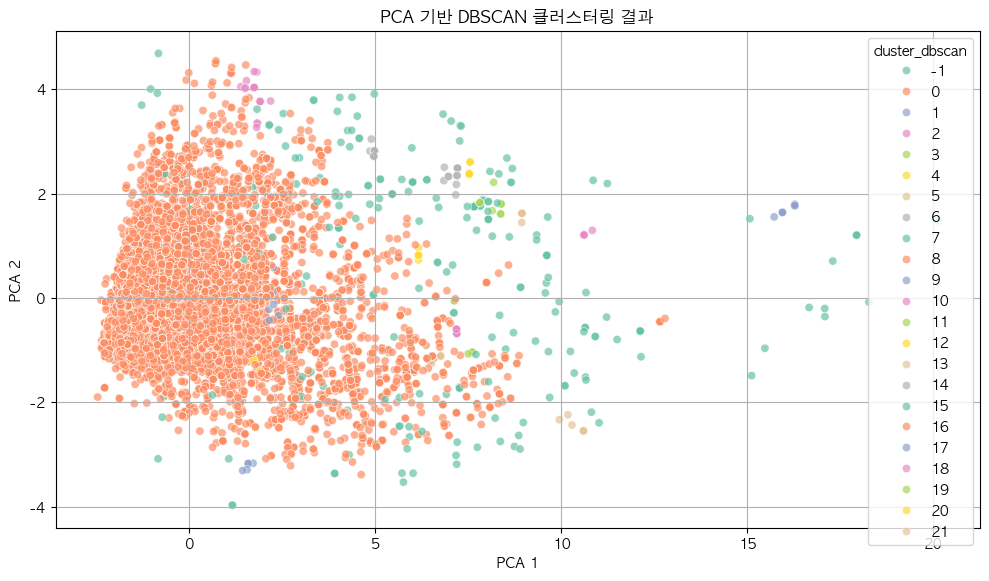

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기
df = pd.read_csv('../Price/clean_data.csv')

# 사용할 변수 지정
features = ['보증금', '월세', '전용면적', '예상 매매가', '단위 면적당 매매가', 'P_max']
X = df[features]

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# PCA로 2차원 변환
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 시각화 (DBSCAN 결과)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_dbscan', palette='Set2', alpha=0.7)
plt.title('PCA 기반 DBSCAN 클러스터링 결과')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# 표를 HTML로 저장
df.to_html('clustering_results_with_dbscan.html', index=False, encoding='utf-8')

# 표를 CSV로 저장
df.to_csv('clustering_results_with_dbscan.csv', index=False, encoding='utf-8-sig')

피쳐 제한해서 클러스터링

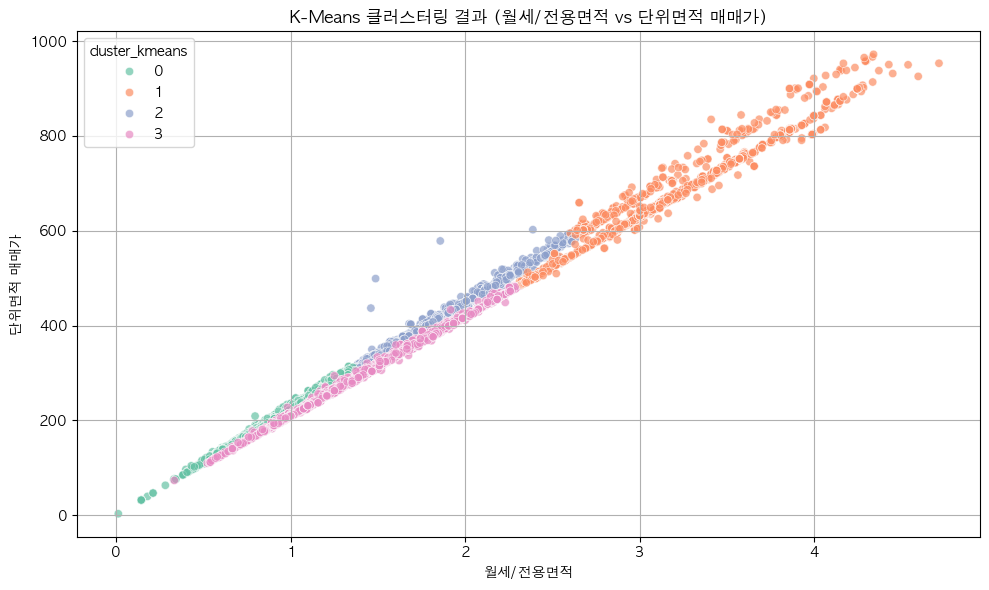

HTML 표가 'kmeans_result_3vars.html'로 저장되었습니다.


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

df = pd.read_csv('../Price/clean_data.csv')

df['월세_전용면적'] = df['월세'] / df['전용면적']

le = LabelEncoder()
df['region_encoded'] = le.fit_transform(df['region'])

features = ['월세_전용면적', 'region_encoded', '단위 면적당 매매가']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='월세_전용면적', y='단위 면적당 매매가', hue='cluster_kmeans', palette='Set2', alpha=0.7)
plt.title('K-Means 클러스터링 결과 (월세/전용면적 vs 단위면적 매매가)')
plt.xlabel('월세/전용면적')
plt.ylabel('단위면적 매매가')
plt.grid(True)
plt.tight_layout()
plt.show()


# 군집별로 정렬 (0번 군집이 먼저 오도록)
df = df.sort_values(by='cluster_kmeans')

# cluster_kmeans를 1열로 이동
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('cluster_kmeans')))
df = df[cols]

# 표를 HTML로 저장
df.to_html('kmeans_result_3vars.html', index=False, encoding='utf-8')

print("HTML 표가 'kmeans_result_3vars.html'로 저장되었습니다.")

가우시안

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
df['cluster_gmm'] = gmm.fit_predict(X_scaled)

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_gmm', palette='Set2', alpha=0.7)
plt.title('GMM 클러스터링 결과')
plt.show()

# ... existing code ...
from sklearn.mixture import GaussianMixture

# GMM 클러스터링
gmm = GaussianMixture(n_components=4, random_state=42)
df['cluster_gmm'] = gmm.fit_predict(X_scaled)

# GMM 결과 시각화
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_gmm', palette='Set2', alpha=0.7)
plt.title('GMM 클러스터링 결과')
plt.show()
# ... existing code ...

# GMM 클러스터링
gmm = GaussianMixture(n_components=4, random_state=42)
df['cluster_gmm'] = gmm.fit_predict(X_scaled)

# 군집별로 데이터 모으기
grouped_df = df.groupby('cluster_gmm').agg(list).reset_index()

# HTML로 저장
grouped_df.to_html('grouped_clustering_results_with_gmm.html', index=False, encoding='utf-8')

# CSV로 저장
grouped_df.to_csv('grouped_clustering_results_with_gmm.csv', index=False, encoding='utf-8-sig')

# GMM 결과 시각화
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_gmm', palette='Set2', alpha=0.7)
plt.title('GMM 클러스터링 결과')
plt.show()

# ... existing code ...

ValueError: Could not interpret value `PCA1` for `x`. An entry with this name does not appear in `data`.